/opt/anaconda3/envs/tora/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,881 (230.00 KB)

 Trainable params: 58,881 (230.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,689 (198.00 KB)

 Trainable params: 50,689 (198.00 KB)

 Non-trainable params: 0 (0.00 B)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.6588 - binary_crossentropy: 0.7464 - loss: 0.7464
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6333 - binary_crossentropy: 9.5243 - loss: 9.5243

scores_basic:  0.7358887791633606
scores_overfit:  9.414850234985352


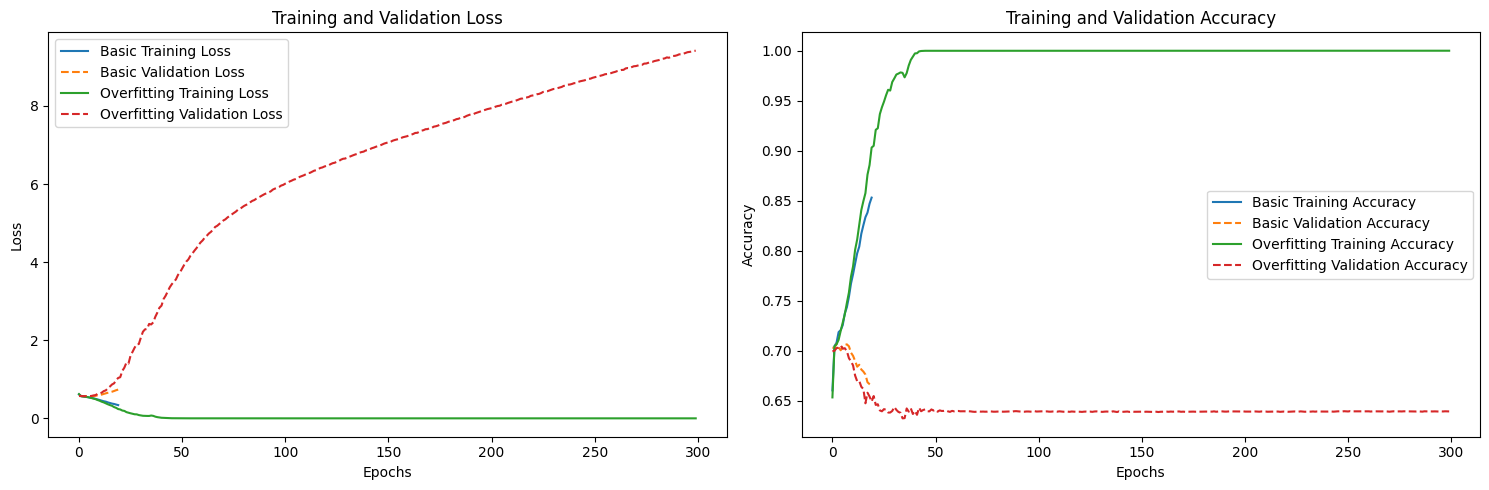

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging, os
logging.disable(logging.WARNING) 

# 데이터를 전처리하는 함수
def sequences_shaping(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
    return results

# 기본 모델 정의
def Basic(word_num):
    basic_model = tf.keras.Sequential([ 
        tf.keras.layers.Dense(256, activation='relu', input_shape=(word_num,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')])
    return basic_model

# 과적합 모델 정의
def Overfitting(word_num):
    overfit_model = tf.keras.Sequential([ 
       tf.keras.layers.Dense(256, activation='relu', input_shape=(word_num,)),
       tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')])
    return overfit_model

# 시각화 함수 정의
def Visualize(histories):
    plt.figure(figsize=(15, 5))

    # 학습 및 검증 손실 시각화
    plt.subplot(1, 2, 1)
    for name, history in histories:
        plt.plot(history.history['loss'], label=f'{name} Training Loss')
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss', linestyle='--')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 학습 및 검증 정확도 시각화
    plt.subplot(1, 2, 2)
    for name, history in histories:
        plt.plot(history.history['accuracy'], label=f'{name} Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy', linestyle='--')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 메인 함수
def main():
    word_num = 100

    # IMDb 데이터셋 로드 및 전처리
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=word_num)
    train_data = sequences_shaping(train_data, dimension=word_num)
    test_data = sequences_shaping(test_data, dimension=word_num)

    train_labels = train_labels.reshape(-1, 1)  # (500,) -> (500, 1)
    test_labels = test_labels.reshape(-1, 1)    # (500,) -> (500, 1)


    # 모델 생성
    basic_model = Basic(word_num)
    overfit_model = Overfitting(word_num)

    # 모델 컴파일
    basic_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])
    overfit_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])

    # 모델 구조 요약 출력
    basic_model.summary()
    overfit_model.summary()

    # 모델 학습
    basic_history = basic_model.fit(train_data, train_labels, epochs=20, batch_size=500, verbose=0, validation_data=(test_data, test_labels))
    overfit_history = overfit_model.fit(train_data, train_labels, epochs=300, batch_size=500, verbose=0, validation_data=(test_data, test_labels))

    # 모델 평가
    scores_basic = basic_model.evaluate(test_data, test_labels)
    scores_overfit = overfit_model.evaluate(test_data, test_labels)

    print('\nscores_basic: ', scores_basic[-1])
    print('scores_overfit: ', scores_overfit[-1])

    # 학습 과정 시각화
    Visualize([('Basic', basic_history), ('Overfitting', overfit_history)])

    return basic_history, overfit_history

if __name__ == "__main__":
    main()